<h1 style="text-align: center;"><img class="responsive" style="float: left;" src="https://is1-ssl.mzstatic.com/image/thumb/Purple112/v4/b5/6e/20/b56e2053-ccd2-d63f-e0fb-a1bf3774eb0b/AppIcon-0-0-1x_U007emarketing-0-0-0-10-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/230x0w.webp" alt="" width="143" height="143" /></h1>
<h1 style="text-align: center;"><img class="responsive" style="font-size: 14px; float: right;" src="https://i0.wp.com/mosefparis1.fr/wp-content/uploads/2022/10/cropped-image-1.png?fit=532%2C540&amp;ssl=1" alt="" width="163" height="165" /></h1>
<h1 style="text-align: center;"><span style="color: #000080; font-family: arial, helvetica, sans-serif;"><strong style="font-size: 24pt;">LCL Challenge</strong></span></h1>
<p style="text-align: center;"><span style="font-size: 14pt;">Scoring Immobilier: Syst&egrave;me Expert BEST&nbsp;IMMO</span></p>
<p style="text-align: center;"><span style="font-size: 10pt; font-family: verdana, geneva, sans-serif;">Lucie Gabagnou,&nbsp;Ghiles Idris,&nbsp;Armand L'Huillier,&nbsp;Yanis Rehoune</span></p>

Ce projet se fait dans le cadre d'un challenge proposé par Mohamed Sneiba Hamoud. Le but est de challenger le modèle de scoring existant dans l'octroi de crédit immobilier.
Les milestones de sont projets sont les suivantes: 
- Vision globale de la base de données: étude de la période + constitution des échantillons
- Preprocessing sur l'ensemble des variables (valeurs manquantes, traitement de types, etc..)
- Sélection de variables (Lasso et tests univariés avec target) + réflexion nouvelles variables
- Discrétisation des variables quantitatives + regroupement de modalités des variables qualitatives (inclut data viz stabilité)
- Modélisation classique: régression logistique + performances
- Modélisation alternative: modèle challengeant
- Grille de score



# Installation de l'environnement de travail

### Packages

In [1]:
# import des modules
#import scipy.stats as stats

from scipy import stats
from scipy.stats import pointbiserialr
import scipy
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection  import train_test_split,GridSearchCV,StratifiedKFold
import warnings 
warnings.filterwarnings("ignore")
import sklearn
from sklearn.linear_model import LogisticRegression
from scripts.firststep_dataviz import min_max_for_datetime_col,missing_rate_report,stabilite_global_temps
from scripts.processing import convert_modalities_to_quali,na_sup_20_fill_by_0_vs_autres,comparer_na_variables_doublons,fill_by_0,imputation_for_na,get_dummies_var,drop_columns
from scripts.feature_selection import test_chi2_all_quali_variables, test_pointbiserial_all_quanti_variables,cramers_v_all_cat_var,selection_avec_lasso,non_significativité_chi2
from scripts.discretisation import discretisation_variables_from_chi2,verification_par_moyenne_defaut, get_binned_df
from scripts.group_cat_variables import liste_quali_a_regrouper, replace_encoding_by_real_mod, regrouper_modalites

In [2]:
#Importation des données
raw_data = pd.read_excel("data/Bases_recents.xlsx")

In [3]:
display(raw_data)

,region_cri,date_debloc_avec_crd,DAT_VALIDE_ACCORD_CRI,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,ASU_BIEN_FIN_BRP,NAT_BIEN_FIN_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
0,ILE DE FRANCE,201405,2010-12-01,1,0,0,40,10,2,1,...,3.140729,NaN,NaN,301510.0,1.083166,1,0,0,0,1
1,ILE DE FRANCE,201405,2011-03-14,2,0,0,10,10,2,1,...,0.999205,NaN,NaN,190962.0,0.310507,0,0,0,0,0
2,PACA,201407,2011-06-21,1,0,0,40,20,1,0,...,4.375182,NaN,NaN,105000.0,1.000000,1,0,0,0,1
3,AUVERGNE,201404,2011-06-27,1,0,0,20,20,2,1,...,2.006637,0.389825,NaN,215280.0,0.800000,0,0,0,0,0
4,ILE DE FRANCE,201404,2011-09-29,3,0,0,10,10,1,0,...,4.536824,0.287687,NaN,177700.0,0.585158,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114411,PAYS DE LA LOIRE,201804,2018-04-06,1,0,0,10,20,2,1,...,3.743370,2.582877,NaN,252670.0,1.052792,0,0,0,0,1
114412,AUVERGNE,201804,2018-03-29,2,0,0,10,10,1,0,...,3.726499,NaN,NaN,244000.0,1.000000,0,0,0,0,1
114413,ILE DE FRANCE,201804,2018-03-28,1,0,0,10,10,2,1,...,6.028812,0.697618,NaN,345680.0,1.002698,0,0,0,0,1
114414,BRETAGNE,201804,2018-03-29,1,0,0,20,20,2,1,...,3.269921,NaN,NaN,147330.0,1.091333,0,0,0,0,0


# Etude générale
- Observations de la base, partiulièrement la période étudiée
- Choix de la date de découpage Temps/ Hors-temps
- Constitution des échantillons 
- Map


#### Définition de la période d'étude
Rq: la date à considérer au cours de l'étude est la date de déblocage et non la date de validation

In [4]:
#Conversion format date
date_columns=["DAT_VALIDE_ACCORD_CRI","date_debloc_avec_crd"]
raw_data["date_debloc_avec_crd"]=pd.to_datetime(raw_data["date_debloc_avec_crd"],format="%Y%m")

In [5]:
for col in date_columns:
    min_max_for_datetime_col(raw_data,col)

Date minimale pour DAT_VALIDE_ACCORD_CRI: 2014-04-01 00:00:00
Date maximale pour DAT_VALIDE_ACCORD_CRI: 2018-04-01 00:00:00
Date minimale pour date_debloc_avec_crd: 2014-04-01 00:00:00
Date maximale pour date_debloc_avec_crd: 2018-04-01 00:00:00


#### Stabilité dans le temps?

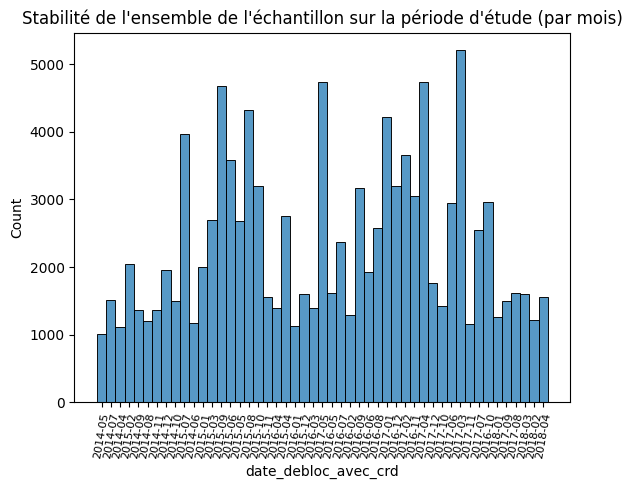

<Figure size 1400x1400 with 0 Axes>

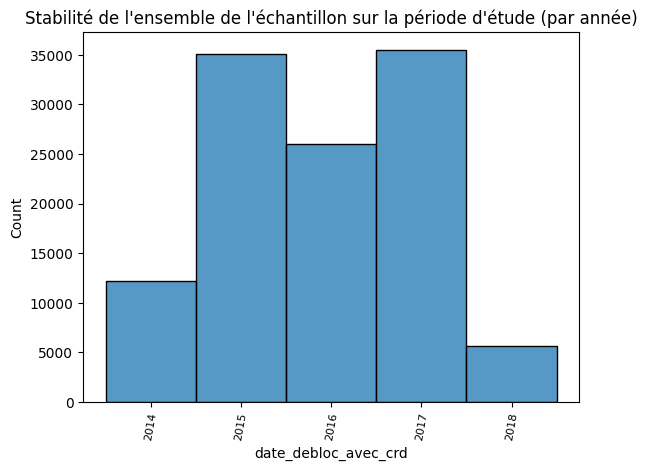

<Figure size 1400x1400 with 0 Axes>

In [6]:
stabilite_global_temps(raw_data)

Même si la base de données semble comporter des valeurs "extrêmes" (au delà de 3000 observations), il n'y a pas une distribution asymétrique entre les années (les données se comportent de la même façon au sein d'une année). On peut donc envisager un découpage hors-temps classique. Par année, le nombre d'observations peut  être différent mais cela peut être largement expliqué par le fait que les années ne sont pas complètes (pour 2014 et 2018).

In [7]:
# Vérification des moyennes sur les potentielles base temps or temps 
print('base OOT :' , raw_data[raw_data["date_debloc_avec_crd"]>"2017-04-01"].mean()['defaut_36mois'] )
print('base principale :', raw_data[(raw_data["date_debloc_avec_crd"]<="2017-04-01") & (raw_data["date_debloc_avec_crd"]>= "2014-04-01"  ) ].mean()['defaut_36mois'] )



base OOT : 0.009738727530138573
base principale : 0.0063661409112362385


Les gens qui ont octroyé un prêt après 04/2017 ont eu plus de défaut sur cette période. On aura sûrement moins de facilité à trouver le défaut sachant que la base OOT a plus d'observations en moyenne comportant des défauts.
Remarque: une explication plausible du taux de défaut plus élevé pourraît être la crise de covid. En effet, les clients considérés à partir d'avril 2017 ont été observés jusqu'en avril 2021 (au max). Cela signifie, contrairement aux autres clients, qu'ils ont connu la crise du covid et la récession qui s'en suit. Peut-être, peut-on considérer base hors temps comme un choc inhabituel? 

#### Découpage de la base

- Découpage temps/hors temps (df_etude, df_hors_temps)
- Découpage base temps: échantillon d'apprentissage et de test (X_train, X_test)

##### Découpage temps/hors-temps

In [8]:
#DECOUPAGE TEMPS/HORS TEMPS
df_hors_temps=raw_data[raw_data["date_debloc_avec_crd"]>="2017-04-01"]
df_etude=raw_data[(raw_data["date_debloc_avec_crd"]<"2017-04-01") & (raw_data["date_debloc_avec_crd"]> "2014-04-01"  ) ]
print("Effectif base temps:", len(df_etude), " VS  Effectif base hors temps:",len(df_hors_temps) )
# Le découpage semble être plutôt approprié

Effectif base temps: 85270  VS  Effectif base hors temps: 28037


##### Découpage Apprentissage/Test
Remarque: on utilise l'option stratify lors de la constitution des échantillons Train et Test de sorte à avoir un taux de défaut représentatif de l'ensemble de l'échantillon

In [9]:

X_train, X_test=train_test_split(df_etude,test_size=0.2 , stratify =df_etude['defaut_36mois'] )
# Vérification que le taux de défaut sur l'échantillon d'apprentissage et validation
print("TAUX DE DEFAUT POUR LES DEUX ECHANTILLONS:")
print( 'train :' , X_train['defaut_36mois'].mean() * 100, " vs ",'test : ' , X_test['defaut_36mois'].mean()*100)
y_train=X_train["defaut_36mois"].astype(int)
drop_columns(X_train,["defaut_36mois"])


TAUX DE DEFAUT POUR LES DEUX ECHANTILLONS:
train : 0.6435440365896563  vs  test :  0.6450099683358743
Ces colonnes vont être retirées: ['defaut_36mois']


,region_cri,date_debloc_avec_crd,DAT_VALIDE_ACCORD_CRI,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,ASU_BIEN_FIN_BRP,NAT_BIEN_FIN_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
22721,GRAND EST,2015-04-01,2015-02-21,1,0,0,10,30,2,1,...,0.666075,NaN,NaN,29280.0,1.025210,0,0,0,0,0
68684,ILE DE FRANCE,2016-09-01,2016-08-05,1,0,0,10,10,2,1,...,4.672619,0.535714,NaN,157000.0,1.000000,0,0,0,0,0
41241,AQUITAINE,2015-10-01,2015-08-11,1,0,0,40,10,2,1,...,2.624301,0.187012,0.034260,203798.0,1.037140,1,0,0,0,0
24494,OCCITANIE,2015-04-01,2015-03-14,1,0,0,10,20,2,1,...,4.722122,0.093417,NaN,146172.0,1.030687,0,0,0,0,0
54896,ILE DE FRANCE,2016-06-01,2016-03-15,1,0,0,40,10,1,0,...,3.152017,NaN,0.042587,181200.0,1.012291,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,NORMANDIE,2015-11-01,2015-07-21,1,0,0,10,20,1,0,...,4.136708,NaN,NaN,113594.0,1.054031,0,0,0,0,1
66904,ILE DE FRANCE,2016-09-01,2016-08-12,2,0,0,10,20,2,1,...,6.256328,0.615832,NaN,396207.0,0.990518,0,0,0,0,1
41642,CENTRE,2015-08-01,2015-07-16,1,0,0,10,20,2,1,...,0.617858,NaN,NaN,30000.0,0.824886,0,0,0,0,0
26058,PAYS DE LA LOIRE,2015-07-01,2015-04-01,1,0,0,40,20,1,0,...,1.499106,7.096295,0.064800,109006.0,1.044859,1,0,0,0,1


L'échantillon test comporte pour l'instant 20% des observations et l'échantillon d'apprentissage 80%. Par ailleurs, on remarque le taux de défaut est quasiment égal (au millième près). La stratification de l'échantillon a été efficace. 

#### Map

# Preprocessing global
- Suppression des colonnes inutiles (indiquées par le métier ou considérées comme inutiles à la suite de l'analyse)
- Traitement des types 
- Valeurs manquantes



####

### Suppression de variables a priori
- TOP_GARANTIE_CL (indiqué sur la description des variables)
- ID n'est pas utilisable


In [10]:
colonnes_drop=['TOP_GARANTIE_CL',"ID"]
X_train.drop(columns= colonnes_drop, inplace = True)

### Traitement des types 

#### Variables de temps:
- On les supprime de l'analyse car ne sont pas forcément pertinente (ça aurait été le cas si on connaissait la date de tombée en défaut..)
- On garde date_for_viz pour stabilité temporelle

In [11]:
date_for_viz=X_train["date_debloc_avec_crd"]
X_train.drop(columns=date_columns,inplace=True)

#### Variables catégorielles

- On convertit les dummies en qualitatives
- On récupère la liste des variables catégorielles (présentes dans le lexique + celles qui sont géographiques..)
- On remarque que certaines variables sont en double, on regardera si certaines ont plus de NA que d'autres par la suite
- Les modalités sont souvent notées 1, 2, 3, etc... ==> Elles vont être lues comme numériques donc il faut les transformer en str (object)

In [12]:
# Il faut peut-être mettre dummies dans variables qualitatives?
list_dummies=get_dummies_var(X_train)
print("Variables dummies: ",list_dummies)
convert_modalities_to_quali(X_train,list_dummies)

Variables dummies:  ['TOP_CONNU_BRP', 'TOP_SCI_BRP', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'TOP_ASC_DESC_BRP', 'ROL_INT_MAX_BRP', 'IND_INCIDENT_BDF_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_BIEN_FR_CRI', 'TOP_NAT_FR_CRI', 'top_locatif', 'top_pret_int_ext', 'top_autre_pret_int', 'top_autre_pret_ext', 'top_pers_seule']


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,ASU_BIEN_FIN_BRP,NAT_BIEN_FIN_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
22721,GRAND EST,1,0,0,10,30,2,1,08230,FRA,...,0.666075,NaN,NaN,29280.0,1.025210,0,0,0,0,0
68684,ILE DE FRANCE,1,0,0,10,10,2,1,94350,FRA,...,4.672619,0.535714,NaN,157000.0,1.000000,0,0,0,0,0
41241,AQUITAINE,1,0,0,40,10,2,1,33740,FRA,...,2.624301,0.187012,0.034260,203798.0,1.037140,1,0,0,0,0
24494,OCCITANIE,1,0,0,10,20,2,1,66680,FRA,...,4.722122,0.093417,NaN,146172.0,1.030687,0,0,0,0,0
54896,ILE DE FRANCE,1,0,0,40,10,1,0,95270,FRA,...,3.152017,NaN,0.042587,181200.0,1.012291,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,NORMANDIE,1,0,0,10,20,1,0,76520,FRA,...,4.136708,NaN,NaN,113594.0,1.054031,0,0,0,0,1
66904,ILE DE FRANCE,2,0,0,10,20,2,1,94100,FRA,...,6.256328,0.615832,NaN,396207.0,0.990518,0,0,0,0,1
41642,CENTRE,1,0,0,10,20,2,1,28500,FRA,...,0.617858,NaN,NaN,30000.0,0.824886,0,0,0,0,0
26058,PAYS DE LA LOIRE,1,0,0,40,20,1,0,44600,FRA,...,1.499106,7.096295,0.064800,109006.0,1.044859,1,0,0,0,1


In [13]:
# On récupère toutes les qualis et on les convertit si elles sont numériques encore (convert_modalities_to_quali)
modalities_var=["TYP_CNT_TRA_MAX_BRP",
                "CODTYPE_PROJET_CRI",
                "COD_ETA_BIEN_CRI",
                "COD_USAGE_BIEN_CRI",
                "STA_CLP_BRP",
                "TYP_LOG_ACT_BRP",
                "QUA_INT_MAX_BRP",
                "ROL_INT_MAX_BRP",
                "CODTYP_CRT_TRAVAIL_CRI",
                "COD_SITU_LOGT_CRI",
                "COD_SIT_FAM_EMPRUNTEUR_CRI",
                "COD_TYPE_MARCHE_CRI",
                "NAT_BIEN_FIN_BRP",
                "SIT_FAM_INT_BRP",
                "COD_CPPOP_CRI", 
                "COD_CSP_BRP",
                "CSP_RGP_BRP",
                "ASU_BIEN_FIN_BRP",
                "CODTYPE_PROJET_CRI",
                "QUA_INT_1_BRP",
                "CODPAY_NAT_EMPRUNTEUR_CRI",
                "DEPARTEMENT_CRI",
                "COD_POSTAL_BIEN_CRI"]  
                



convert_modalities_to_quali(X_train, modalities_var)


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,ASU_BIEN_FIN_BRP,NAT_BIEN_FIN_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
22721,GRAND EST,1,0,0,10,30,2,1,08230,FRA,...,0.666075,NaN,NaN,29280.0,1.025210,0,0,0,0,0
68684,ILE DE FRANCE,1,0,0,10,10,2,1,94350,FRA,...,4.672619,0.535714,NaN,157000.0,1.000000,0,0,0,0,0
41241,AQUITAINE,1,0,0,40,10,2,1,33740,FRA,...,2.624301,0.187012,0.034260,203798.0,1.037140,1,0,0,0,0
24494,OCCITANIE,1,0,0,10,20,2,1,66680,FRA,...,4.722122,0.093417,NaN,146172.0,1.030687,0,0,0,0,0
54896,ILE DE FRANCE,1,0,0,40,10,1,0,95270,FRA,...,3.152017,NaN,0.042587,181200.0,1.012291,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,NORMANDIE,1,0,0,10,20,1,0,76520,FRA,...,4.136708,NaN,NaN,113594.0,1.054031,0,0,0,0,1
66904,ILE DE FRANCE,2,0,0,10,20,2,1,94100,FRA,...,6.256328,0.615832,NaN,396207.0,0.990518,0,0,0,0,1
41642,CENTRE,1,0,0,10,20,2,1,28500,FRA,...,0.617858,NaN,NaN,30000.0,0.824886,0,0,0,0,0
26058,PAYS DE LA LOIRE,1,0,0,40,20,1,0,44600,FRA,...,1.499106,7.096295,0.064800,109006.0,1.044859,1,0,0,0,1


### Valeurs manquantes

Ici, on a distingué trois types de valeurs manquantes: 
- si taux > 90% on vire ces variables
- si taux entre 20 % et 90 %, on a plusieurs possibilités:
    +  si SUM = NA correspond à une valeur nulle 
    +  sinon on fait la même chose pour les variables quali et quanti que pour les na faibles

In [14]:
df_missing_rate=missing_rate_report(X_train)

,count,rate
FINANCEMENT_PR_BRP,67120,98.393339
IRPRO_USAGE_V12_MAX,66859,98.010731
SUM_MNT_PRE_INTERNE_BRP,66388,97.320277
TX_APPORT_AGENCE_BRP,66199,97.043216
TX_FINANCEMENT_AGENCE_BRP,66199,97.043216
...,...,...
MNT_COUT_TOT_CREDIT_CRI,0,0.000000
PCT_TEG_TAEG_CRI,0,0.000000
PCT_NEGOC_CRI,0,0.000000
MNT_PRET_CRI,0,0.000000


#### NA > 90%

In [15]:
#On enleve les variables comportant trop de na cad supérieur à 90%
high_na=df_missing_rate.index[df_missing_rate["rate"]> 90 ].tolist()
print("TRAITEMENT VALEURS MANQUANTES > 90%")
drop_columns(X_train,high_na)

TRAITEMENT VALEURS MANQUANTES > 90%
Ces colonnes vont être retirées: ['FINANCEMENT_PR_BRP', 'IRPRO_USAGE_V12_MAX', 'SUM_MNT_PRE_INTERNE_BRP', 'TX_APPORT_AGENCE_BRP', 'TX_FINANCEMENT_AGENCE_BRP', 'TX_APPORT_BRP', 'TX_FINANCEMENT_BRP', 'mnt_pret_ext_brp', 'SUM_LOYER_BRP', 'SUM_AUTRES_CHARG_BRP']


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,ASU_BIEN_FIN_BRP,NAT_BIEN_FIN_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
22721,GRAND EST,1,0,0,10,30,2,1,08230,FRA,...,0.666075,NaN,NaN,29280.0,1.025210,0,0,0,0,0
68684,ILE DE FRANCE,1,0,0,10,10,2,1,94350,FRA,...,4.672619,0.535714,NaN,157000.0,1.000000,0,0,0,0,0
41241,AQUITAINE,1,0,0,40,10,2,1,33740,FRA,...,2.624301,0.187012,0.034260,203798.0,1.037140,1,0,0,0,0
24494,OCCITANIE,1,0,0,10,20,2,1,66680,FRA,...,4.722122,0.093417,NaN,146172.0,1.030687,0,0,0,0,0
54896,ILE DE FRANCE,1,0,0,40,10,1,0,95270,FRA,...,3.152017,NaN,0.042587,181200.0,1.012291,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,NORMANDIE,1,0,0,10,20,1,0,76520,FRA,...,4.136708,NaN,NaN,113594.0,1.054031,0,0,0,0,1
66904,ILE DE FRANCE,2,0,0,10,20,2,1,94100,FRA,...,6.256328,0.615832,NaN,396207.0,0.990518,0,0,0,0,1
41642,CENTRE,1,0,0,10,20,2,1,28500,FRA,...,0.617858,NaN,NaN,30000.0,0.824886,0,0,0,0,0
26058,PAYS DE LA LOIRE,1,0,0,40,20,1,0,44600,FRA,...,1.499106,7.096295,0.064800,109006.0,1.044859,1,0,0,0,1


#### NA < 90% 

On a fait plusieurs constats: 
- On a des variables catégorielles en double: intéressant de voir si une comporte plus de na que son doublon   / Démarche à faire pour quanti si il y a 
- SUM => Il semblerait que ces variables contiennent des na si c'est = 0 (épargne non renseignée = n'a pas d'épargne)
#

On propose une fonction qui :
- pour SUM => fill par 0
- pour variables catégorielles = imputation par mode
- pour variables quantitatives = imputation par médiane 

##### Traitement variables catégorielles en double et NaN

In [16]:

#On remarque directement dans le lexique qu'il y a des variables en double. Si l'une des variables en doublons est plus complète qu'une autre, on a interêt à la garder 

dict_doublons={"NAT_BIEN_FIN_BRP" : "CODTYPE_PROJET_CRI",
                        "ASU_BIEN_FIN_BRP" : "COD_USAGE_BIEN_CRI",
                        "TYP_CNT_TRA_MAX_BRP" : "CODTYP_CRT_TRAVAIL_CRI",
                        "SIT_FAM_INT_BRP" : "COD_SIT_FAM_EMPRUNTEUR_CRI",
                        "TYP_LOG_ACT_BRP" : "COD_SITU_LOGT_CRI"
                        }
     
colonnes_doublons_to_drop=comparer_na_variables_doublons(X_train,dict_doublons)
drop_columns(X_train,colonnes_doublons_to_drop)


COMPARAISON NA POUR COLONNES EN DOUBLE
NAT_BIEN_FIN_BRP  VS  CODTYPE_PROJET_CRI
0  VS  0
ASU_BIEN_FIN_BRP  VS  COD_USAGE_BIEN_CRI
0  VS  0
TYP_CNT_TRA_MAX_BRP  VS  CODTYP_CRT_TRAVAIL_CRI
573  VS  573
SIT_FAM_INT_BRP  VS  COD_SIT_FAM_EMPRUNTEUR_CRI
0  VS  0
TYP_LOG_ACT_BRP  VS  COD_SITU_LOGT_CRI
0  VS  0
DONE
Ces colonnes vont être retirées: ['NAT_BIEN_FIN_BRP', 'ASU_BIEN_FIN_BRP', 'TYP_CNT_TRA_MAX_BRP', 'SIT_FAM_INT_BRP', 'TYP_LOG_ACT_BRP']


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,...,Mt_credit_nb_ans_rev_prof,Epargne_nb_ans_rev_prof,rentabilite_loc,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
22721,GRAND EST,1,0,0,2,1,08230,FRA,30,70,...,0.666075,NaN,NaN,29280.0,1.025210,0,0,0,0,0
68684,ILE DE FRANCE,1,0,0,2,1,94350,FRA,10,10,...,4.672619,0.535714,NaN,157000.0,1.000000,0,0,0,0,0
41241,AQUITAINE,1,0,0,2,1,33740,FRA,10,10,...,2.624301,0.187012,0.034260,203798.0,1.037140,1,0,0,0,0
24494,OCCITANIE,1,0,0,2,1,66680,FRA,20,70,...,4.722122,0.093417,NaN,146172.0,1.030687,0,0,0,0,0
54896,ILE DE FRANCE,1,0,0,1,0,95270,FRA,10,10,...,3.152017,NaN,0.042587,181200.0,1.012291,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,NORMANDIE,1,0,0,1,0,76520,FRA,20,70,...,4.136708,NaN,NaN,113594.0,1.054031,0,0,0,0,1
66904,ILE DE FRANCE,2,0,0,2,1,94100,FRA,20,10,...,6.256328,0.615832,NaN,396207.0,0.990518,0,0,0,0,1
41642,CENTRE,1,0,0,2,1,28500,FRA,20,60,...,0.617858,NaN,NaN,30000.0,0.824886,0,0,0,0,0
26058,PAYS DE LA LOIRE,1,0,0,1,0,44600,FRA,20,70,...,1.499106,7.096295,0.064800,109006.0,1.044859,1,0,0,0,1


#### NA > 20%

In [17]:
#On traite les na qui doivent avoir un traitement particulier cad qu'elles comportent bcp de na mais ne doivent pas être supprimé
df_missing_rate=missing_rate_report(X_train)
missing_rate_sup_20=df_missing_rate.index[df_missing_rate["rate"]>20 ].tolist()
print("TRAITEMENT POUR VALEURS MANQUANTES >20%: ", missing_rate_sup_20)
variables_a_fill_0, variables_na_to_drop = na_sup_20_fill_by_0_vs_autres(missing_rate_sup_20)
print("Variables non supprimées: ",variables_a_fill_0)
fill_by_0(X_train, variables_a_fill_0)
drop_columns(X_train,variables_na_to_drop)


,count,rate
rentabilite_loc,56851,83.339686
SUM_RESS_IMMO_BRP,56745,83.184297
COUT_NOTAIRE_BRP,39040,57.229975
COUT_ACQ_BRP,38209,56.011786
SUM_PATR_IMMO_BRP,35306,51.756186
...,...,...
MNT_COUT_TOT_CREDIT_CRI,0,0.000000
PCT_TEG_TAEG_CRI,0,0.000000
PCT_NEGOC_CRI,0,0.000000
MNT_PRET_CRI,0,0.000000


TRAITEMENT POUR VALEURS MANQUANTES >20%:  ['rentabilite_loc', 'SUM_RESS_IMMO_BRP', 'COUT_NOTAIRE_BRP', 'COUT_ACQ_BRP', 'SUM_PATR_IMMO_BRP', 'SUM_MTENCBIE_IMMO_BRP', 'SUM_MNT_PRE_EXTERNE_BRP', 'Epargne_nb_ans_rev_prof', 'SUM_EPARGNE_BRP', 'SUM_MTENCBIE_EPARGNE_BRP', 'SUM_TAX_FISC_BRP']
Variables non supprimées:  ['SUM_RESS_IMMO_BRP', 'SUM_PATR_IMMO_BRP', 'SUM_MTENCBIE_IMMO_BRP', 'SUM_MNT_PRE_EXTERNE_BRP', 'SUM_EPARGNE_BRP', 'SUM_MTENCBIE_EPARGNE_BRP', 'SUM_TAX_FISC_BRP']
IMPUTATION PAR 0
OK
Ces colonnes vont être retirées: ['rentabilite_loc', 'COUT_NOTAIRE_BRP', 'COUT_ACQ_BRP', 'Epargne_nb_ans_rev_prof']


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,...,TOP_NAT_FR_CRI,CSP_RGP_BRP,Mt_credit_nb_ans_rev_prof,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
22721,GRAND EST,1,0,0,2,1,08230,FRA,30,70,...,1,6.0,0.666075,29280.0,1.025210,0,0,0,0,0
68684,ILE DE FRANCE,1,0,0,2,1,94350,FRA,10,10,...,0,4.0,4.672619,157000.0,1.000000,0,0,0,0,0
41241,AQUITAINE,1,0,0,2,1,33740,FRA,10,10,...,1,3.0,2.624301,203798.0,1.037140,1,0,0,0,0
24494,OCCITANIE,1,0,0,2,1,66680,FRA,20,70,...,1,5.0,4.722122,146172.0,1.030687,0,0,0,0,0
54896,ILE DE FRANCE,1,0,0,1,0,95270,FRA,10,10,...,1,3.0,3.152017,181200.0,1.012291,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,NORMANDIE,1,0,0,1,0,76520,FRA,20,70,...,1,5.0,4.136708,113594.0,1.054031,0,0,0,0,1
66904,ILE DE FRANCE,2,0,0,2,1,94100,FRA,20,10,...,1,4.0,6.256328,396207.0,0.990518,0,0,0,0,1
41642,CENTRE,1,0,0,2,1,28500,FRA,20,60,...,1,4.0,0.617858,30000.0,0.824886,0,0,0,0,0
26058,PAYS DE LA LOIRE,1,0,0,1,0,44600,FRA,20,70,...,1,3.0,1.499106,109006.0,1.044859,1,0,0,0,1


#### NA faible (<20%)

In [18]:
imputation_for_na(X_train)


IMPUTATION PAR MODE OU MEDIANE
OK


,region_cri,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,COD_POSTAL_BIEN_CRI,CODPAY_BIEN_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,...,TOP_NAT_FR_CRI,CSP_RGP_BRP,Mt_credit_nb_ans_rev_prof,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
22721,GRAND EST,1,0,0,2,1,08230,FRA,30,70,...,1,6.0,0.666075,29280.0,1.025210,0,0,0,0,0
68684,ILE DE FRANCE,1,0,0,2,1,94350,FRA,10,10,...,0,4.0,4.672619,157000.0,1.000000,0,0,0,0,0
41241,AQUITAINE,1,0,0,2,1,33740,FRA,10,10,...,1,3.0,2.624301,203798.0,1.037140,1,0,0,0,0
24494,OCCITANIE,1,0,0,2,1,66680,FRA,20,70,...,1,5.0,4.722122,146172.0,1.030687,0,0,0,0,0
54896,ILE DE FRANCE,1,0,0,1,0,95270,FRA,10,10,...,1,3.0,3.152017,181200.0,1.012291,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,NORMANDIE,1,0,0,1,0,76520,FRA,20,70,...,1,5.0,4.136708,113594.0,1.054031,0,0,0,0,1
66904,ILE DE FRANCE,2,0,0,2,1,94100,FRA,20,10,...,1,4.0,6.256328,396207.0,0.990518,0,0,0,0,1
41642,CENTRE,1,0,0,2,1,28500,FRA,20,60,...,1,4.0,0.617858,30000.0,0.824886,0,0,0,0,0
26058,PAYS DE LA LOIRE,1,0,0,1,0,44600,FRA,20,70,...,1,3.0,1.499106,109006.0,1.044859,1,0,0,0,1


In [19]:
verif_valeurs_manquantes = X_train.isna().sum().sort_values()
print("Nombre de NaN:",verif_valeurs_manquantes)
print("TRAITEMENT DES VALEURS MANQUANTES: OK ")


Nombre de NaN: region_cri                  0
NBR_AGE_CLIENT_CRI          0
IND_PRIMO_ACCEDT_CRI        0
IND_INCIDENT_BDF_CRI        0
COD_TYPE_MARCHE_CRI         0
                           ..
NBR_DUREE_TOT_PRET_CRI      0
top_exist_conso_revo_BRP    0
TOP_SURFINANCEMENT_BRP      0
LTV_OCTROI_BRP              0
top_pers_seule              0
Length: 99, dtype: int64
TRAITEMENT DES VALEURS MANQUANTES: OK 


# Sélection de variables: Régression Lasso VS étude univariée


#### Variables considérées comme utiles mais qui ne seront pas significatives: proxys
Les variables comme le code postal, la région, etc.. ne doivent pas être utilisé lors de cette sélection


In [20]:
#Drop colonnes géo et nationalité pour l'instant = on les réintroduira dans l'analyse pour variables auxiliaires
list_geo_features=["region_cri","COD_POSTAL_BIEN_CRI","DEPARTEMENT_CRI","NAT_INT_MAX_BRP","CODPAY_NAT_EMPRUNTEUR_CRI","CODPAY_BIEN_CRI"]
drop_columns(X_train,list_geo_features)

Ces colonnes vont être retirées: ['region_cri', 'COD_POSTAL_BIEN_CRI', 'DEPARTEMENT_CRI', 'NAT_INT_MAX_BRP', 'CODPAY_NAT_EMPRUNTEUR_CRI', 'CODPAY_BIEN_CRI']


,nb_pret,TOP_CONNU_BRP,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,...,TOP_NAT_FR_CRI,CSP_RGP_BRP,Mt_credit_nb_ans_rev_prof,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
22721,1,0,0,2,1,30,70,60,10,5720.00,...,1,6.0,0.666075,29280.0,1.025210,0,0,0,0,0
68684,1,0,0,2,1,10,10,60,10,8000.00,...,0,4.0,4.672619,157000.0,1.000000,0,0,0,0,0
41241,1,0,0,2,1,10,10,20,40,29498.50,...,1,3.0,2.624301,203798.0,1.037140,1,0,0,0,0
24494,1,0,0,2,1,20,70,50,10,24328.00,...,1,5.0,4.722122,146172.0,1.030687,0,0,0,0,0
54896,1,0,0,1,0,10,10,20,40,29498.50,...,1,3.0,3.152017,181200.0,1.012291,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,1,0,0,1,0,20,70,60,10,96406.00,...,1,5.0,4.136708,113594.0,1.054031,0,0,0,0,1
66904,2,0,0,2,1,20,10,60,10,3793.00,...,1,4.0,6.256328,396207.0,0.990518,0,0,0,0,1
41642,1,0,0,2,1,20,60,60,10,6368.66,...,1,4.0,0.617858,30000.0,0.824886,0,0,0,0,0
26058,1,0,0,1,0,20,70,40,40,40994.00,...,1,3.0,1.499106,109006.0,1.044859,1,0,0,0,1


### Etude univariée

#### Variables quantitatives: Point Biserial


In [21]:
#Since the p-value of this correlation is not less than .05, this correlation is not statistically significant. 
print("si la pvalue<0.05  alors la variable associée est significative au seuil de 5%")
df_point_bis=test_pointbiserial_all_quanti_variables(X_train,y_train)
quanti_non_significatives = df_point_bis["variable"][df_point_bis["pvalue"]<0.05].tolist()
display(df_point_bis[df_point_bis['pvalue'] <= 0.05])


si la pvalue<0.05  alors la variable associée est significative au seuil de 5%


,variable,corr,pvalue
3,BEST_APPORT_MT_BRP,-0.016,0.000
4,BEST_APPORT_TX_BRP,-0.028,0.000
8,TX_APPORT_HF_HT_BRP,-0.021,0.000
10,TX_APPORT_TF_HT_BRP,-0.016,0.000
12,TX_APPORT_SE_BRP,-0.029,0.000
13,LTV_OCTROI_BRP,0.027,0.000
14,LTV_ACPR_BRP,0.029,0.000
15,NBR_DUREE_TOT_PRET_CRI,0.020,0.000
17,PCT_NEGOC_CRI,0.023,0.000
18,PCT_TEG_TAEG_CRI,0.034,0.000


#### Variables qualitatives: Chi2


In [22]:
print("si la pvalue<0.05  alors la variable associée est significative au seuil de 5%")
df_chi2=test_chi2_all_quali_variables(X_train,y_train)
quali_non_significatives=df_chi2["variable"][df_chi2["pvalue"]<0.05].tolist()
display(df_chi2[df_chi2['pvalue'] <= 0.05].sort_values(by="Chi2",ascending=False))

display(cramers_v_all_cat_var(X_train).style.highlight_between(left=60/100,right=98/100))

si la pvalue<0.05  alors la variable associée est significative au seuil de 5%


,variable,Chi2,pvalue
3,COD_CPPOP_CRI,136.024809,0.000
17,COD_SITU_LOGT_CRI,96.558575,0.000
10,COD_CSP_BRP,80.330887,0.009
4,COD_ETA_BIEN_CRI,50.377349,0.000
16,CODTYP_CRT_TRAVAIL_CRI,36.524856,0.000
21,IND_PRIMO_ACCEDT_CRI,23.652983,0.000
7,TOP_PRET_RELAIS_BRP,18.893758,0.000
24,CSP_RGP_BRP,17.993543,0.021
18,COD_SIT_FAM_EMPRUNTEUR_CRI,16.791699,0.010
19,COD_TYPE_MARCHE_CRI,15.674178,0.000


,TOP_CONNU_BRP,TOP_SCI_BRP,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,TOP_ETR_BRP,TOP_PRET_RELAIS_BRP,TOP_SURFINANCEMENT_BRP,top_exist_conso_revo_BRP,COD_CSP_BRP,STA_CLP_BRP,TOP_ASC_DESC_BRP,QUA_INT_1_BRP,QUA_INT_MAX_BRP,ROL_INT_MAX_BRP,CODTYP_CRT_TRAVAIL_CRI,COD_SITU_LOGT_CRI,COD_SIT_FAM_EMPRUNTEUR_CRI,COD_TYPE_MARCHE_CRI,IND_INCIDENT_BDF_CRI,IND_PRIMO_ACCEDT_CRI,TOP_BIEN_FR_CRI,TOP_NAT_FR_CRI,CSP_RGP_BRP,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
TOP_CONNU_BRP,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TOP_SCI_BRP,nan,0.999120,0.309630,0.061448,0.039324,0.272753,0.020157,0.006274,0.000000,0.049679,0.999619,0.999978,0.000000,0.999985,0.999985,0.041955,0.052539,0.999949,0.999963,0.999114,0.000000,0.043020,0.002454,0.015649,0.999949,0.167186,0.017741,0.011311,0.011311,0.120982
CODTYPE_PROJET_CRI,nan,0.309630,1.000000,0.115487,0.118052,0.423522,0.056017,0.022803,0.087424,0.131088,0.123680,0.154979,0.003815,0.202349,0.191390,0.105912,0.023097,0.135266,0.169568,0.221481,0.000000,0.106531,0.000000,0.047882,0.132234,0.398333,0.040660,0.030785,0.030785,0.266765
COD_CPPOP_CRI,nan,0.061448,0.115487,1.000000,0.352401,0.080156,0.099841,0.129163,0.253152,0.170280,0.054990,0.067522,0.018642,0.066186,0.058702,0.044960,0.030600,0.230051,0.109648,0.055909,0.000000,0.322467,0.000000,0.086584,0.052281,0.159739,0.190393,0.188563,0.188563,0.186631
COD_ETA_BIEN_CRI,nan,0.039324,0.118052,0.352401,1.000000,0.189265,0.051332,0.044443,0.267602,0.071579,0.047447,0.020275,0.000000,0.053204,0.040351,0.025393,0.015886,0.090160,0.050417,0.047742,0.000000,0.179912,0.010272,0.046294,0.044741,0.404874,0.074855,0.092385,0.092385,0.105187
COD_USAGE_BIEN_CRI,nan,0.272753,0.423522,0.080156,0.189265,1.000000,0.039039,0.053363,0.255325,0.025109,0.168152,0.136536,0.013111,0.160944,0.163988,0.049947,0.047020,0.157462,0.136102,0.194019,0.000000,0.139734,0.062959,0.033594,0.160668,0.999971,0.013926,0.081831,0.081831,0.061050
TOP_ETR_BRP,nan,0.020157,0.056017,0.099841,0.051332,0.039039,0.999843,0.000000,0.031012,0.034035,0.089774,0.023196,0.020405,0.039550,0.044976,0.007438,0.060849,0.110364,0.095457,0.020374,0.000489,0.095024,0.008329,0.786462,0.054024,0.036564,0.004711,0.013532,0.013532,0.061324
TOP_PRET_RELAIS_BRP,nan,0.006274,0.022803,0.129163,0.044443,0.053363,0.000000,0.999454,0.042566,0.019138,0.064177,0.021568,0.000000,0.012343,0.013761,0.011448,0.030856,0.075654,0.037380,0.010541,0.010909,0.081142,0.000000,0.000000,0.058734,0.052318,0.002767,0.000000,0.000000,0.028170
TOP_SURFINANCEMENT_BRP,nan,0.000000,0.087424,0.253152,0.267602,0.255325,0.031012,0.042566,0.999944,0.064959,0.074420,0.015505,0.000000,0.043039,0.026085,0.011305,0.023574,0.034126,0.046325,0.021579,0.000000,0.074006,0.000000,0.028284,0.056200,0.251207,0.043584,0.016496,0.016496,0.043762
top_exist_conso_revo_BRP,nan,0.049679,0.131088,0.170280,0.071579,0.025109,0.034035,0.019138,0.064959,0.999959,0.111775,0.050989,0.000000,0.097778,0.089407,0.045239,0.047273,0.187190,0.156672,0.054176,0.000000,0.102206,0.000000,0.030025,0.099448,0.010733,0.013037,0.042442,0.042442,0.142484


[INTERPRETATON CRAMER]

### Régression Lasso

#### Sur variables quantitatives uniquement:

In [23]:
var_quanti_selectionnees = selection_avec_lasso(X_train,y_train,20,'num')
print("Variables quantitatives sélectionnées par Lasso (seulement sur les variables quanti):",var_quanti_selectionnees)

,coef
TX_APPORT_TF_AT_BRP,0.635103
IRPAR_USAGE_V12_MAX,0.427179
PCT_TEG_TAEG_CRI,0.373151
COUT_RACHAT_BRP,0.320972
COUT_PROJET_HF_HT_BRP,0.320876
MNT_RESSOURCES_CRI,0.319525
BEST_APPORT_TX_BRP,0.289854
SUM_PATR_IMMO_BRP,0.278488
COUT_PROJET_HF_AT_BRP,0.269238
NBR_OCCUP_CRI,0.233802


Variables quantitatives sélectionnées par Lasso (seulement sur les variables quanti): ['TX_APPORT_TF_AT_BRP', 'IRPAR_USAGE_V12_MAX', 'PCT_TEG_TAEG_CRI', 'COUT_RACHAT_BRP', 'COUT_PROJET_HF_HT_BRP', 'MNT_RESSOURCES_CRI', 'BEST_APPORT_TX_BRP', 'SUM_PATR_IMMO_BRP', 'COUT_PROJET_HF_AT_BRP', 'NBR_OCCUP_CRI', 'MNT_PRET_CRI', 'nb_pret', 'BEST_APPORT_MT_BRP', 'NBR_ENF_ACHARGE_CRI', 'SUM_MTENCBIE_IMMO_BRP', 'COUT_BIEN_FINANCE_BRP', 'PCT_APPORT_PERS_CRI', 'PAR_SCI_BRP', 'quotite', 'TX_APPORT_HF_HT_BRP']


Avant de poursuivre l'analyse avec ces variables, il faut s'assurer de la non-multicolinéarité des variables. En effet, il se peut que certaines variables perdent de l'importance (du poids) dans la régression du fait de la multicolinéarité. Par conséquent, on regarde la matrice de corrélation:

<AxesSubplot: >

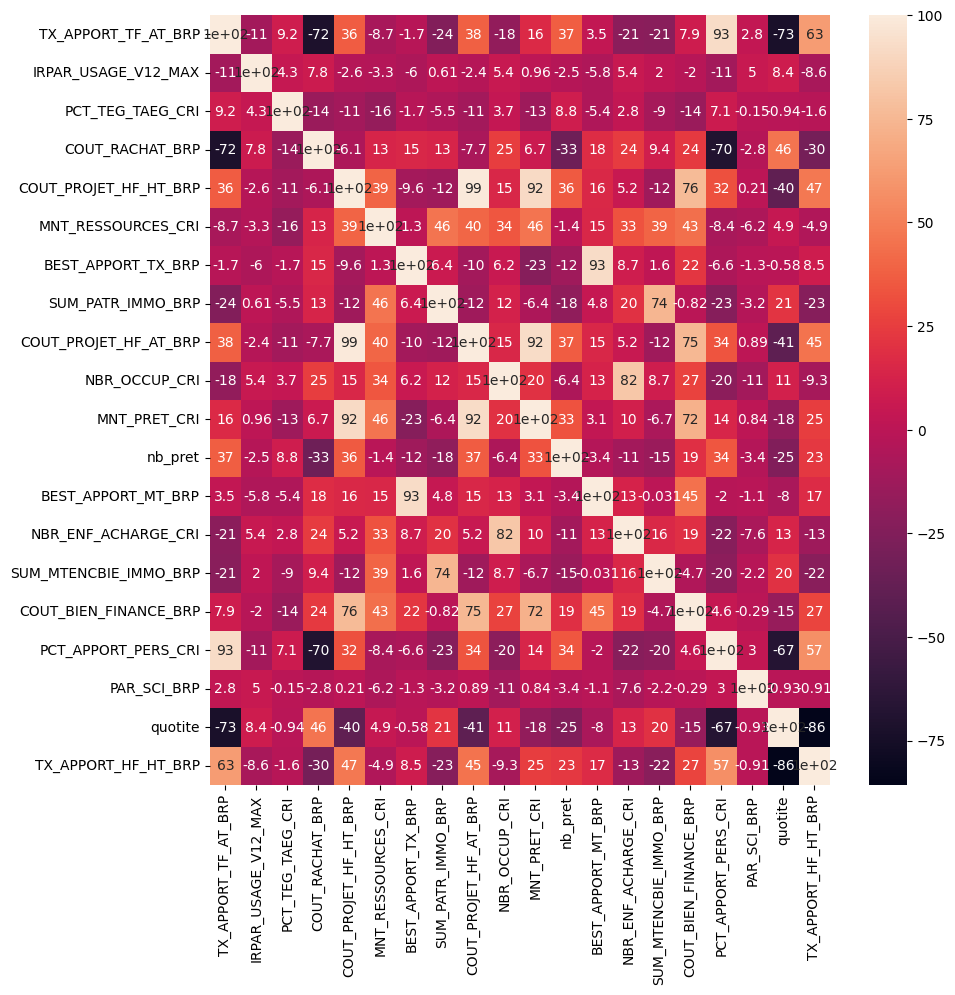

In [24]:
# heatmap apres suppressions des variables qui causent de la multi colinéarité 
plt.figure(figsize = (10,10))
sns.heatmap(X_train[var_quanti_selectionnees].corr(method = 'spearman')*100 , annot = True) 

Plusieurs variables semblent générer de la multicolinéarité, on va donc les supprimer:
- [A COMPLETER]

In [25]:
# # suppresion des variables qui causent de la multi corr

# var_quanti_selectionnees.remove('TX_APPORT_TF_AT_BRP' )
# var_quanti_selectionnees.remove('TX_APPORT_HF_HT_BRP' )
# var_quanti_selectionnees.remove('COUT_PROJET_HF_HT_BRP' )
# var_quanti_selectionnees.remove('BEST_APPORT_MT_BRP' )

# # prendre les 10 premieres 

#### Sur l'ensemble des variables:

In [26]:
var_selectionnees = selection_avec_lasso(X_train,y_train,20,'all')
print("Variables sélectionnées par Lasso:",var_selectionnees)

        nb_pret  NBR_INT_BRP  NBR_TOT_COEMPR_CRI  BEST_APPORT_MT_BRP  \
0     -0.610493     0.626746            0.716237           -0.522416   
1     -0.610493     0.626746            0.716237           -0.498258   
2     -0.610493     0.626746            0.716237           -0.270467   
3     -0.610493     0.626746            0.716237           -0.325252   
4     -0.610493    -1.380960           -1.375412           -0.270467   
...         ...          ...                 ...                 ...   
68211 -0.610493    -1.380960           -1.375412            0.438462   
68212  1.328396     0.626746            0.716237           -0.542834   
68213 -0.610493     0.626746            0.716237           -0.515543   
68214 -0.610493    -1.380960           -1.375412           -0.148665   
68215 -0.610493    -1.380960           -1.375412           -0.448204   

       BEST_APPORT_TX_BRP  PCT_APPORT_PERS_CRI  PCT_ENDETTMT_CRI  \
0               -0.236622            -0.574727          0.578491   

,coef
COD_ETA_BIEN_CRI_20,0.838420
COD_SITU_LOGT_CRI_20.0,0.448714
IRPAR_USAGE_V12_MAX,0.440836
CODTYP_CRT_TRAVAIL_CRI_4,0.374916
PCT_APPORT_PERS_CRI,0.356414
COD_ETA_BIEN_CRI_60,0.351832
PCT_TEG_TAEG_CRI,0.301588
QUA_INT_1_BRP_3,0.288662
COD_CPPOP_CRI_70,0.286372
COD_CSP_BRP_5500.0,0.279053


Variables sélectionnées par Lasso: ['COD_ETA_BIEN_CRI_20', 'COD_SITU_LOGT_CRI_20.0', 'IRPAR_USAGE_V12_MAX', 'CODTYP_CRT_TRAVAIL_CRI_4', 'PCT_APPORT_PERS_CRI', 'COD_ETA_BIEN_CRI_60', 'PCT_TEG_TAEG_CRI', 'QUA_INT_1_BRP_3', 'COD_CPPOP_CRI_70', 'COD_CSP_BRP_5500.0', 'COD_SITU_LOGT_CRI_10.0', 'TX_APPORT_TF_AT_BRP', 'TOP_PRET_RELAIS_BRP_1', 'COD_SITU_LOGT_CRI_50.0', 'MNT_RESSOURCES_CRI', 'TOP_PRET_RELAIS_BRP_0', 'COD_SITU_LOGT_CRI_60.0', 'nb_pret', 'IND_PRIMO_ACCEDT_CRI_1.0', 'COD_SIT_FAM_EMPRUNTEUR_CRI_3.0']


#### Variables candidates pour l'instant:
variables_selected=[]

## Discrétisation  + regroupement de modalités 
Dans cette partie, on se charge de:
-  discrétiser les variables quantitatives en modalités 
-  réduire le nombre de modalités pour les variables qualitatives (trop de modalités ==> surapprentissage)

### Regroupement des modalités pour les variables catégorielles


#### Nécessaire de regrouper des modalités?
Sans exception, toutes les variables qualitatives sont catégorielles. On va regarder le nombre de modalités pour chacune d'entre elles


Certaines variables ont trop (surapprentissage) ou pas assez de modalités (nombre de modalités =1 => aucune discrimination):
- On ne traite pas la CSP avec bcp de modalités (l'autre variable CSP disponible est plus pertinente et a le bon nombre de modalité)
- la variable STA qui n'a pas de modalités interprétables
- ROL_INT_MAX n'a pas plus d'une modalité


In [27]:
drop_columns(X_train,["COD_CSP_BRP","STA_CLP_BRP","ROL_INT_MAX_BRP","TOP_CONNU_BRP"])

Ces colonnes vont être retirées: ['COD_CSP_BRP', 'STA_CLP_BRP', 'ROL_INT_MAX_BRP', 'TOP_CONNU_BRP']


,nb_pret,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,BEST_APPORT_TX_BRP,...,TOP_NAT_FR_CRI,CSP_RGP_BRP,Mt_credit_nb_ans_rev_prof,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
22721,1,0,2,1,30,70,60,10,5720.00,16.34,...,1,6.0,0.666075,29280.0,1.025210,0,0,0,0,0
68684,1,0,2,1,10,10,60,10,8000.00,4.85,...,0,4.0,4.672619,157000.0,1.000000,0,0,0,0,0
41241,1,0,2,1,10,10,20,40,29498.50,15.91,...,1,3.0,2.624301,203798.0,1.037140,1,0,0,0,0
24494,1,0,2,1,20,70,50,10,24328.00,14.27,...,1,5.0,4.722122,146172.0,1.030687,0,0,0,0,0
54896,1,0,1,0,10,10,20,40,29498.50,15.91,...,1,3.0,3.152017,181200.0,1.012291,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,1,0,1,0,20,70,60,10,96406.00,45.91,...,1,5.0,4.136708,113594.0,1.054031,0,0,0,0,1
66904,2,0,2,1,20,10,60,10,3793.00,0.95,...,1,4.0,6.256328,396207.0,0.990518,0,0,0,0,1
41642,1,0,2,1,20,60,60,10,6368.66,17.51,...,1,4.0,0.617858,30000.0,0.824886,0,0,0,0,0
26058,1,0,1,0,20,70,40,40,40994.00,27.33,...,1,3.0,1.499106,109006.0,1.044859,1,0,0,0,1


#### Regroupement des modalités

 Avant regroupement: On regarde si certaines sont déja non significatives. Si jamais on vient à toucher aux modalités, c'est important de vérifier que ce n'est pas l'encodage qui a fait ça


In [28]:
non_significatif_avant_regroupement=non_significativité_chi2(X_train,y_train)

VARIABLES QUALITATIVES NON SIGNIFICATIVES AU SEUIL DE 5%
['COD_CPPOP_CRI', 'COD_ETA_BIEN_CRI', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'TOP_ASC_DESC_BRP', 'QUA_INT_1_BRP', 'QUA_INT_MAX_BRP', 'CODTYP_CRT_TRAVAIL_CRI', 'COD_SITU_LOGT_CRI', 'COD_SIT_FAM_EMPRUNTEUR_CRI', 'COD_TYPE_MARCHE_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_NAT_FR_CRI', 'CSP_RGP_BRP']


##### Regroupement des modalités manuellement
- On récupère la liste des variables ayant plus de 5 modalités: il s'agit d'un seuil arbitraire, qui selon nous, semble pertinent. En effet, lorsqu'il y a trop de modalités, qui ont, qui plus est, peu d'observations, il convient de les regrouper pour éviter du surapprentissage

In [29]:
liste_inf_5_modalites,liste_sup_5_modalites = liste_quali_a_regrouper(X_train)

La priorité est de traiter les variables ayant trop de modalités (>8). D'une part on va renommer les catégories et effectuer un rassemblement de certaines modalités à la main. Dans un second temps, on va procéder à une sélection automatique. A la fin, on aura l'ensemble des variables catégorielles qui ont encore plus d'une modalité. 

In [30]:
replace_encoding_by_real_mod(X_train)
non_significatif_post_regroupement=non_significativité_chi2(X_train,y_train)

VARIABLES QUALITATIVES NON SIGNIFICATIVES AU SEUIL DE 5%
['CODTYPE_PROJET_CRI', 'COD_CPPOP_CRI', 'COD_ETA_BIEN_CRI', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'TOP_ASC_DESC_BRP', 'QUA_INT_1_BRP', 'QUA_INT_MAX_BRP', 'CODTYP_CRT_TRAVAIL_CRI', 'COD_SITU_LOGT_CRI', 'COD_TYPE_MARCHE_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_NAT_FR_CRI', 'CSP_RGP_BRP']


#### Regroupement des modalités automatiquement
- On a crée un algorithme qui permet de rassembler les modalités si elles ne sont pas assez remplies ou ne sont pas significatives.
- Deux objectifs: diminuer nombre de modalités et vérifier leur pertinence
- Si une modalités comporte moins de 5% ==> on doit la merge avec une autre modalité = on tente par modalité ayant la moyenne la plus proche
- Si la variable la plus proche n'est pas plus importante, alors on prend la classe majoritaire

In [31]:
X_train,cat_var_drop,dict_modalites_group=regrouper_modalites(X_train,y_train,X_train.select_dtypes(include="object"))
drop_columns(X_train,cat_var_drop) 

TOP_SCI_BRP
1  est intégré dans la modalité  0
CODTYPE_PROJET_CRI
sci/scpi  est intégré dans la modalité  maison (classe majoritaire)
autres  est intégré dans la modalité  maison (classe majoritaire)
local mixte et professionnel  est intégré dans la modalité  maison (classe majoritaire)
COD_CPPOP_CRI
soulte  est intégré dans la modalité  achat (classe majoritaire)
construction  est intégré dans la modalité  achat (classe majoritaire)
travaux  est intégré dans la modalité  achat (classe majoritaire)
COD_ETA_BIEN_CRI
autres  est intégré dans la modalité  récent_inf_10_ans
COD_USAGE_BIEN_CRI
residence secondaire  est intégré dans la modalité  locatif
TOP_ETR_BRP
1  est intégré dans la modalité  0
TOP_PRET_RELAIS_BRP
1  est intégré dans la modalité  0
TOP_SURFINANCEMENT_BRP
top_exist_conso_revo_BRP
TOP_ASC_DESC_BRP
1  est intégré dans la modalité  0
QUA_INT_1_BRP
5  est intégré dans la modalité  4
QUA_INT_MAX_BRP
entité  est intégré dans la modalité  mademoiselle
CODTYP_CRT_TRAVAIL_CRI
cdd

,nb_pret,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,BEST_APPORT_TX_BRP,...,TOP_NAT_FR_CRI,CSP_RGP_BRP,Mt_credit_nb_ans_rev_prof,financement_tot,quotite,top_locatif,top_pret_int_ext,top_autre_pret_int,top_autre_pret_ext,top_pers_seule
22721,1,0,2,1,maison,achat,ancien_sup_10_ans,residence principale,5720.00,16.34,...,1,ouvriers,0.666075,29280.0,1.025210,0,0,0,0,0
68684,1,0,2,1,appartement,achat,ancien_sup_10_ans,residence principale,8000.00,4.85,...,0,professions Intermédiaires,4.672619,157000.0,1.000000,0,0,0,0,0
41241,1,0,2,1,appartement,achat,neuf,locatif,29498.50,15.91,...,1,cadres et professions intellectuelles supérieures,2.624301,203798.0,1.037140,1,0,0,0,0
24494,1,0,2,1,maison,achat,ancien_sup_10_ans,residence principale,24328.00,14.27,...,1,employés,4.722122,146172.0,1.030687,0,0,0,0,0
54896,1,0,1,0,appartement,achat,neuf,locatif,29498.50,15.91,...,1,cadres et professions intellectuelles supérieures,3.152017,181200.0,1.012291,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,1,0,1,0,maison,achat,ancien_sup_10_ans,residence principale,96406.00,45.91,...,1,employés,4.136708,113594.0,1.054031,0,0,0,0,1
66904,2,0,2,1,maison,achat,ancien_sup_10_ans,residence principale,3793.00,0.95,...,1,professions Intermédiaires,6.256328,396207.0,0.990518,0,0,0,0,1
41642,1,0,2,1,maison,travaux,ancien_sup_10_ans,residence principale,6368.66,17.51,...,1,professions Intermédiaires,0.617858,30000.0,0.824886,0,0,0,0,0
26058,1,0,1,0,maison,achat,récent_inf_10_ans,locatif,40994.00,27.33,...,1,cadres et professions intellectuelles supérieures,1.499106,109006.0,1.044859,1,0,0,0,1


In [32]:
# on fait un test du Chi2 pour voir si le regroupement auto a changé la significativité:
non_significatif_post_regroupement_auto=non_significativité_chi2(X_train,y_train)

VARIABLES QUALITATIVES NON SIGNIFICATIVES AU SEUIL DE 5%
['CODTYPE_PROJET_CRI', 'COD_CPPOP_CRI', 'COD_ETA_BIEN_CRI', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'TOP_ASC_DESC_BRP', 'QUA_INT_1_BRP', 'QUA_INT_MAX_BRP', 'CODTYP_CRT_TRAVAIL_CRI', 'COD_SITU_LOGT_CRI', 'COD_TYPE_MARCHE_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_NAT_FR_CRI', 'CSP_RGP_BRP']


#### Conclusion

In [33]:
# On regarde si le traitement des modalités a été intéressant:

print("---------------------------------VARIABLES CATEGORIELLES NON SIGNIFICATIVES AU SEUIL DE 5%---------------------------------")

print("--------------------------------AVANT---------------------------------------------------------------")
print(non_significatif_avant_regroupement)
print("-------------------------------REGROUPEMENT MANUEL---------------------------------------------")
print(non_significatif_post_regroupement)
print("-------------------------------REGROUPEMENT AUTO-----------------------------------------")
print(non_significatif_post_regroupement_auto)

---------------------------------VARIABLES CATEGORIELLES NON SIGNIFICATIVES AU SEUIL DE 5%---------------------------------
--------------------------------AVANT---------------------------------------------------------------
['COD_CPPOP_CRI', 'COD_ETA_BIEN_CRI', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'TOP_ASC_DESC_BRP', 'QUA_INT_1_BRP', 'QUA_INT_MAX_BRP', 'CODTYP_CRT_TRAVAIL_CRI', 'COD_SITU_LOGT_CRI', 'COD_SIT_FAM_EMPRUNTEUR_CRI', 'COD_TYPE_MARCHE_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_NAT_FR_CRI', 'CSP_RGP_BRP']
-------------------------------REGROUPEMENT MANUEL---------------------------------------------
['CODTYPE_PROJET_CRI', 'COD_CPPOP_CRI', 'COD_ETA_BIEN_CRI', 'TOP_ETR_BRP', 'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP', 'top_exist_conso_revo_BRP', 'TOP_ASC_DESC_BRP', 'QUA_INT_1_BRP', 'QUA_INT_MAX_BRP', 'CODTYP_CRT_TRAVAIL_CRI', 'COD_SITU_LOGT_CRI', 'COD_TYPE_MARCHE_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_NAT_FR_CRI', 'CSP_RGP_BRP']
-

### Discrétisation des variables quantitatives


In [34]:
discretisation_variables_from_chi2(X_train)


,nb_pret,TOP_SCI_BRP,NBR_INT_BRP,NBR_TOT_COEMPR_CRI,CODTYPE_PROJET_CRI,COD_CPPOP_CRI,COD_ETA_BIEN_CRI,COD_USAGE_BIEN_CRI,BEST_APPORT_MT_BRP,BEST_APPORT_TX_BRP,...,g_quotite,g_PCT_TEG_TAEG_CRI,g_MOY_ANC_PROF_BRP,g_nb_pret,g_MNT_COUT_TOT_CREDIT_CRI,g_BEST_APPORT_TX_BRP,g_COUT_PROJET_HF_AT_BRP,g_SUM_MTENCBIE_IMMO_BRP,g_MNT_PRET_CRI,g_AGE_INT_MAX_BRP
22721,1,0,2,1,maison,achat,ancien_sup_10_ans,residence principale,5720.00,16.34,...,grp_1,grp_3,grp_3,grp_2,grp_1,grp_2,grp_2,grp_3,grp_2,grp_1
68684,1,0,2,1,appartement,achat,ancien_sup_10_ans,residence principale,8000.00,4.85,...,grp_4,grp_3,grp_3,grp_2,grp_1,grp_3,grp_2,grp_3,grp_2,grp_1
41241,1,0,2,1,appartement,achat,neuf,locatif,29498.50,15.91,...,grp_1,grp_3,grp_1,grp_2,grp_3,grp_3,grp_2,grp_2,grp_2,grp_1
24494,1,0,2,1,maison,achat,ancien_sup_10_ans,residence principale,24328.00,14.27,...,grp_1,grp_3,grp_1,grp_2,grp_1,grp_3,grp_2,grp_3,grp_2,grp_1
54896,1,0,1,0,appartement,achat,neuf,locatif,29498.50,15.91,...,grp_2,grp_3,grp_2,grp_2,grp_3,grp_3,grp_2,grp_2,grp_2,grp_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,1,0,1,0,maison,achat,ancien_sup_10_ans,residence principale,96406.00,45.91,...,grp_3,grp_3,grp_2,grp_2,grp_1,grp_1,grp_1,grp_3,grp_1,grp_1
66904,2,0,2,1,maison,achat,ancien_sup_10_ans,residence principale,3793.00,0.95,...,grp_4,grp_3,grp_3,grp_1,grp_3,grp_4,grp_3,grp_3,grp_3,grp_1
41642,1,0,2,1,maison,travaux,ancien_sup_10_ans,residence principale,6368.66,17.51,...,grp_3,grp_2,grp_2,grp_2,grp_1,grp_2,grp_2,grp_3,grp_2,grp_1
26058,1,0,1,0,maison,achat,récent_inf_10_ans,locatif,40994.00,27.33,...,grp_3,grp_3,grp_1,grp_2,grp_1,grp_2,grp_1,grp_3,grp_1,grp_2


Vérification que la discrétisation est pertinente avec : 
- un groupby par moyenne de défaut pour chaque variable 
- un test du khi2 

In [35]:
verification_par_moyenne_defaut(X_train,y_train)

------ pour la variable g_IRPAR_USAGE_V12_MAX : 

g_IRPAR_USAGE_V12_MAX
grp_1    0.004677
grp_2    0.005929
grp_3    0.017290
Name: defaut_36mois, dtype: float64

------ pour la variable g_MNT_TOT_ASSURANCE_CRI : 

g_MNT_TOT_ASSURANCE_CRI
grp_1    0.004731
grp_2    0.007339
grp_3    0.013080
Name: defaut_36mois, dtype: float64

------ pour la variable g_COUT_RACHAT_BRP : 

g_COUT_RACHAT_BRP
grp_1    0.003409
grp_2    0.004590
grp_3    0.009153
Name: defaut_36mois, dtype: float64

------ pour la variable g_SUM_PATR_IMMO_BRP : 

g_SUM_PATR_IMMO_BRP
grp_1    0.004935
grp_2    0.006655
Name: defaut_36mois, dtype: float64

------ pour la variable g_quotite : 

g_quotite
grp_1    0.004184
grp_2    0.005593
grp_3    0.007911
grp_4    0.013365
Name: defaut_36mois, dtype: float64

------ pour la variable g_PCT_TEG_TAEG_CRI : 

g_PCT_TEG_TAEG_CRI
grp_1    0.003167
grp_2    0.004903
grp_3    0.005590
grp_4    0.010880
Name: defaut_36mois, dtype: float64

------ pour la variable g_MOY_ANC_PROF_BRP

Certaines variables ont trop (surapprentissage) ou pas assez de modalités (nombre de modalités =1 => aucune discrimination):
- On ne traite pas la CSP avec bcp de modalités (l'autre variable CSP disponible est plus pertinente et a le bon nombre de modalité)
- la variable STA qui n'a pas de modalités interprétables
- ROL_INT_MAX n'a pas plus d'une modalité


## Overview de la sélection de variables
- Quelles sont les variables finalement retenues?
- Etude de la stabilité temporelles
 

In [39]:

X_train_final=X_train.select_dtypes(include=object)
X_train_final
print("Liste des variables à utiliser:",X_train_final.columns)


Liste des variables à utiliser: Index(['TOP_SCI_BRP', 'CODTYPE_PROJET_CRI', 'COD_CPPOP_CRI',
       'COD_ETA_BIEN_CRI', 'COD_USAGE_BIEN_CRI', 'TOP_ETR_BRP',
       'TOP_PRET_RELAIS_BRP', 'TOP_SURFINANCEMENT_BRP',
       'top_exist_conso_revo_BRP', 'TOP_ASC_DESC_BRP', 'QUA_INT_1_BRP',
       'QUA_INT_MAX_BRP', 'CODTYP_CRT_TRAVAIL_CRI', 'COD_SITU_LOGT_CRI',
       'COD_SIT_FAM_EMPRUNTEUR_CRI', 'COD_TYPE_MARCHE_CRI',
       'IND_INCIDENT_BDF_CRI', 'IND_PRIMO_ACCEDT_CRI', 'TOP_BIEN_FR_CRI',
       'TOP_NAT_FR_CRI', 'CSP_RGP_BRP', 'top_locatif', 'top_pret_int_ext',
       'top_autre_pret_int', 'top_autre_pret_ext', 'top_pers_seule',
       'g_IRPAR_USAGE_V12_MAX', 'g_MNT_TOT_ASSURANCE_CRI', 'g_COUT_RACHAT_BRP',
       'g_SUM_PATR_IMMO_BRP', 'g_quotite', 'g_PCT_TEG_TAEG_CRI',
       'g_MOY_ANC_PROF_BRP', 'g_nb_pret', 'g_MNT_COUT_TOT_CREDIT_CRI',
       'g_BEST_APPORT_TX_BRP', 'g_COUT_PROJET_HF_AT_BRP',
       'g_SUM_MTENCBIE_IMMO_BRP', 'g_MNT_PRET_CRI', 'g_AGE_INT_MAX_BRP'],
      dtype='obj

[STABILITE TEMPORELLE]

# Modélisation classique: régression logistique

In [47]:
X_train_dummies = pd.get_dummies(X_train_final, drop_first = True)

x_train, x_test, y_train, y_test = train_test_split(X_train_dummies , y_train, stratify = y_train ) 

param = {'penalty' : ['elasticnet', 'none', 'l2' ] , 
'C' : [0.01, 0.1 , 1, 10] ,
 'solver' :  ['saga' ,'lbfgs '], 
 'l1_ratio' : [ 0 , 0.1 , 0.01] } 
kfold = StratifiedKFold( n_splits = 3 ) 

logit = LogisticRegression(class_weight= 'balanced', random_state = 42)
model = GridSearchCV(logit, param, cv=kfold ,scoring = 'roc_auc') 
model.fit(x_train , y_train)

model.best_params_

NameError: name 'LogisticRegression' is not defined

In [ ]:
# entrainer le modele sur les meilleurs params trouvés grace au grid search cv 

logit_apres_grid_search = LogisticRegression(class_weight= 'balanced', random_state = 42 , 
                                            C= 0.01, l1_ratio =  0, penalty = 'l2', solver = 'lbfgs')

logit_apres_grid_search.fit(x_train , y_train)

In [ ]:
y_pred_train = logit_apres_grid_search.predict_proba(x_train) 
y_pred_train = pd.DataFrame(y_pred_train).iloc[: , 1]

score_auc_train = sklearn.metrics.roc_auc_score(y_train, y_pred_train)
score_auc_train


In [ ]:
y_pred_test = logit_apres_grid_search.predict_proba(x_test) 
y_pred_test = pd.DataFrame(y_pred_test).iloc[: , 1]

score_auc_test = sklearn.metrics.roc_auc_score(y_test, y_pred_test)
score_auc_test

In [ ]:
# pd.DataFrame(abs( logit_apres_grid_search.coef_.T ), index = X_train_discretise.columns, columns= ['coef']).sort_values(by = 'coef', ascending = False)


In [ ]:
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt 

fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train , pos_label = 1 )
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test , pos_label = 1 )

plt.plot(fpr_train, tpr_train, label = f'auc_train {score_auc_train.round(2)}') 
plt.plot(fpr_test, tpr_test, label = f'auc_test {score_auc_test.round(2)}') 
plt.plot([0,1], [0,1])
plt.title('auc')
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.xlim([0,1])
plt.ylim([0,1])




plt.legend()